# Web Scraping from Github Website


**Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer program. It's a useful technique for creating datasets for research and learning.**
![](https://i.imgur.com/6zM7JBq.png)

### What is GitHub?
GitHub is an online software development platform. It's used for storing, tracking, and collaborating on software projects.
It makes it easy for developers to share code files and collaborate with fellow developers on open-source projects. GitHub also serves as a social networking site where developers can openly network, collaborate, and pitch their work. Since its founding in 2008, GitHub has acquired millions of users and established itself as a go-to platform for collaborative software projects. This free service comes with several helpful features for sharing code and working with others in real time.

On top of its code-related functions, GitHub encourages users to build a personal profile and brand for themselves. You can visit anyone’s profile and see what projects they own and contribute to. This makes GitHub a type of social network for programmers and fosters a collaborative approach to software and website development.

### Tools used for Web Scrapping-
**Python, Requests, BeautifulSoup, Pandas**

## We are going to do Web Scraping in two parts-

### Part 1-
**We are going to scrap data from https://github.com/topics. For each individual featured topic, we will extract Topic Title, Topic Description and Topic page URL. We will create csv file for extracted data for the page.**

We will do this in following steps-

1. **Use the requests library to download web pages**

    - Inspect the website's HTML source and identify the right URLs to download.
    - Download and save web pages locally using the `requests` library.


2. **Use Beautiful Soup to parse and extract information**

    - Parse and explore the structure of downloaded web pages using Beautiful soup.
    - Use the right properties and methods to extract the required information.


3. **Create CSV file(s) with the extracted information**

    - Create functions for the end-to-end process of downloading, parsing, and saving CSVs.
    - Execute the function to create a dataset of CSV files which contains Topic Title, Topic Description and Topic page URL.
    

### Part 2-
#### Getting Repository Information out of a each topic page
**In second part, For each topic, we'll scrape the repo name, username, stars and repo URL of top 20 repositories in each topic from the topic page. We will create csv file for extracted data for each topic. For each topic, we'll create a CSV file in the following format:**

- Repo Name,Username,Stars,Repo URL
- three.js,mrdoob,69700,https://github.com/mrdoob/three.js
- libgdx,libgdx,18300,https://github.com/libgdx/libgdx

   
1. **Use the requests library to download web pages**

    - Inspect the website's HTML source and identify the right URLs to download.
    - Download and save web pages locally using the `requests` library.


2. **Use Beautiful Soup to parse and extract information**

    - Parse and explore the structure of downloaded web pages using Beautiful soup.
    - Use the right properties and methods to extract the required information.
    - (Optional) Use a REST API to acquire additional information if required.


3. **Create CSV file(s) with the extracted information**

    - Create functions for the end-to-end process of downloading, parsing, and saving CSVs.
    - Execute the function to create a dataset of CSV files which contains username who uploaded that repository, repository name, stars on repository, and url of respository.

# Part-1
### **We are going to scrap data from https://github.com/topics. For each individual featured topic, we will extract Topic Title, Topic Description and Topic page URL. We will create csv file for extracted data for the page.**

## Use of requests library to download web pages

In [1]:
# We are installing the request library in the system
!pip install requests --upgrade --quiet

In [2]:
## Importing the requests library
import requests

In [3]:
## With the help of requests.get, we are downloading the html script of https://github.com/topics
topics_url = "https://github.com/topics"
response = requests.get(topics_url)

In [4]:
# Checking code is succesfully executed or not
response.status_code

200

In [5]:
# length of html script
len(response.text)

155222

In [6]:
# Converting html script into html text
page_contents = response.text

In [7]:
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-0946cdc16f15.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-3946c959759a.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-href="h

In [8]:
## Saving html text downloaded with request library in a file
with open ('webpage.html', 'w') as f:
    f.write(page_contents)

## Use Beautiful Soup to parse and extract information

In [9]:
## Installing BeautifulSoup Library
!pip install beautifulsoup4 --upgrade --quiet

In [10]:
## Importing BeautifulSoup Library
from bs4 import BeautifulSoup 

In [11]:
# parsing with BeautifulSoup Library
doc = BeautifulSoup(page_contents, 'html.parser')

**Finding the topic name by inspecting the site, and finding the html script, html tag and class for topic name. 
We will extract html text with 'p' tag and class= 'f3 lh-condensed mb-0 mt-1 Link--primary' to get topic titles**
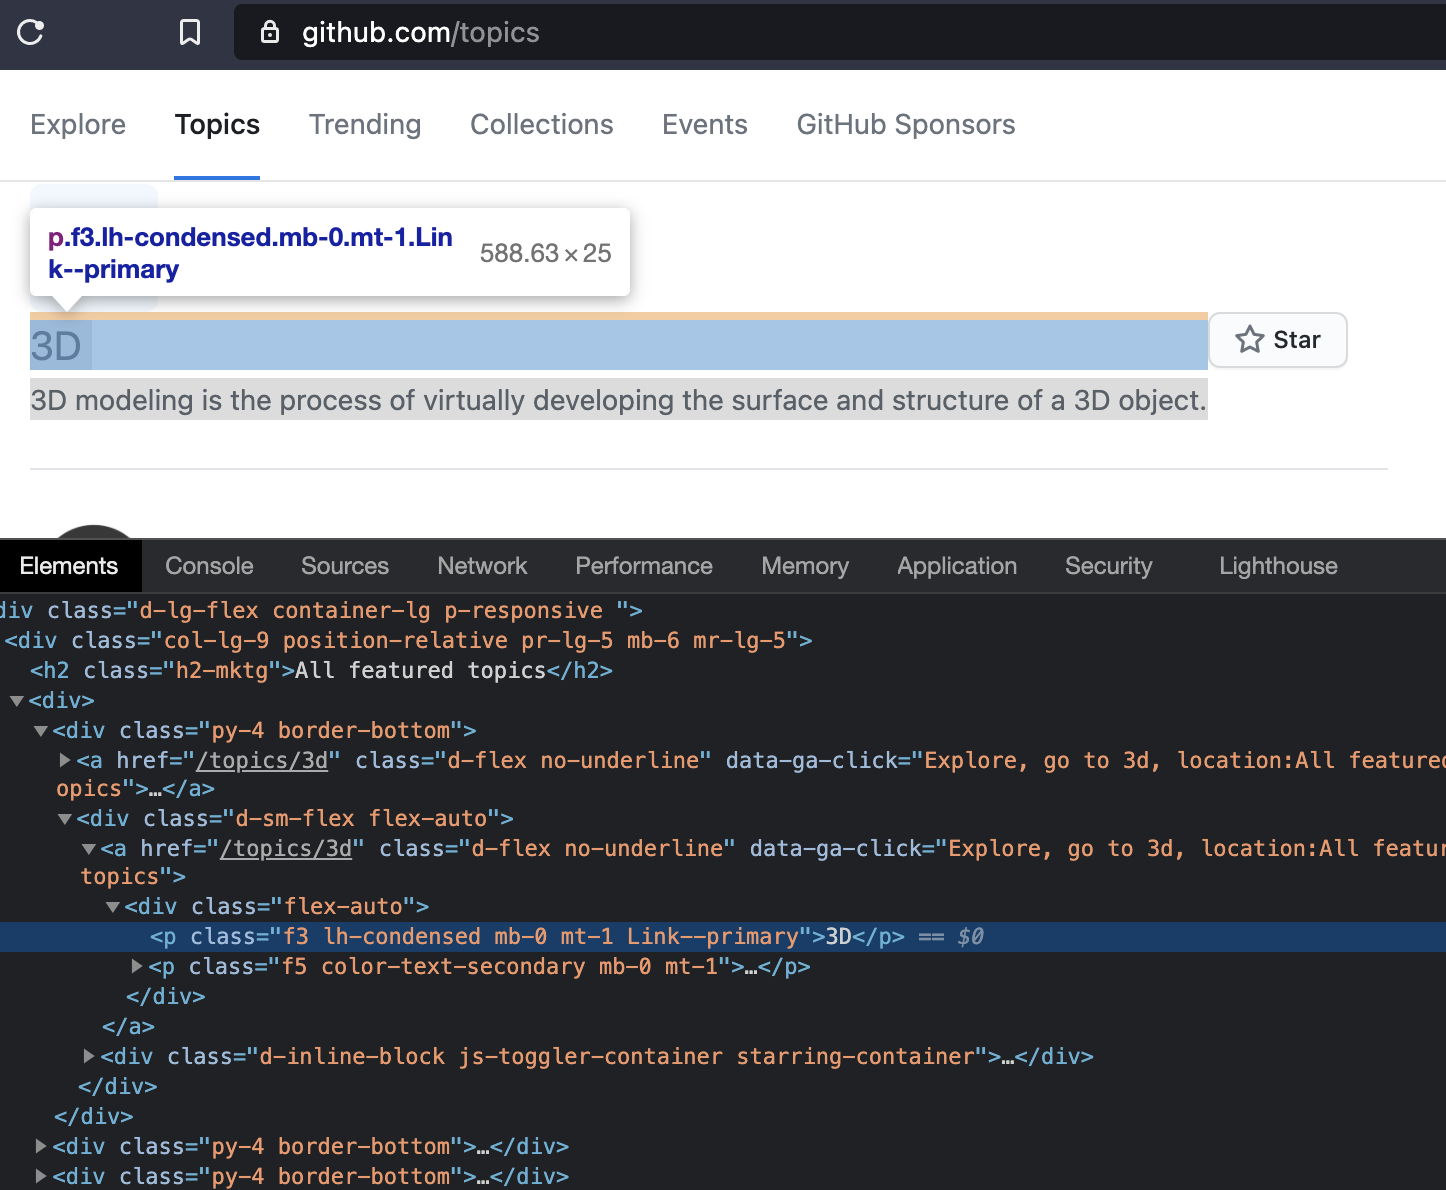

In [12]:
selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'

topic_title_tags = doc.find_all('p', {'class': selection_class})

In [13]:
topic_title_tags[0].text

'3D'

In [14]:
len(topic_title_tags)

30

In [15]:
# Finding the topic description by inspecting the site, and finding the html script, html tag and class for description. 
# We will extract html text with 'p' tag and class= 'f5 color-fg-muted mb-0 mt-1'

topic_desc_tags  = doc.find_all('p', {'class' :'f5 color-fg-muted mb-0 mt-1'})

In [16]:
topic_desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [17]:
# Finding the topic link by inspecting the site, and finding the html script, html tag and class for topic link. 
# We will extract html text with 'a' tag and class= 'no-underline flex-grow-0'

topic_link_tags = doc.find_all('a', {'class':'no-underline flex-grow-0'})

In [18]:
len(topic_link_tags)

30

In [19]:
topic_link_tags[0]

<a class="no-underline flex-grow-0" href="/topics/3d">
<div class="color-bg-accent f4 color-fg-muted text-bold rounded mr-3 flex-shrink-0 text-center" style="width:64px; height:64px; line-height:64px;">
            #
          </div>
</a>

In [20]:
# the href attribute specifies the location (URL) of the external resource
topic_link_tags[0]['href']

'/topics/3d'

In [21]:
# Adding https://github.com in topic_link_tags. 
topic0_url = "https://github.com" + topic_link_tags[0]['href']

In [22]:
topic0_url

'https://github.com/topics/3d'

In [23]:
# Saving Topic Title in a list
topic_titles=[]
for topic in topic_title_tags:
    topic_titles.append(topic.text)
    

In [24]:
topic_titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

In [25]:
# Saving Topic Description in a list
topic_desc = []
for desc in topic_desc_tags:
    topic_desc.append(desc.text.strip())
    
topic_desc[:5]

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

In [26]:
# Saving Topic URL Link in a list
topic_urls =[]
base_url = "https://github.com"
for url in topic_link_tags:
    topic_urls.append(base_url + url["href"])

topic_urls[:5]  

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android']

In [27]:
# Installing Pandas 
!pip install pandas --upgrade --quiet

In [28]:
# Importing Pandas Library
import pandas as pd

In [29]:
# Saving lists in the Dataframe
dic = {'Topic Title Tags' : topic_titles, 'Topic Tag Description': topic_desc, 'Topic Url': topic_urls}
topic_df = pd.DataFrame(dic)

In [30]:
topic_df

,Topic Title Tags,Topic Tag Description,Topic Url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


## Create CSV file(s) with the extracted information

In [31]:
# Converting Dataframe into CSV File
topic_df.to_csv('topics.csv', index=None)

## Putting all in one, by creating functions which will ease our work to findout and scrap data of top featured topics on Github everytime you execute this function.

In [32]:
def scrape_topics():
    ## With the help of requests.get, we are downloading the html script of https://github.com/topics
    topics_url = "https://github.com/topics"
    response = requests.get(topics_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    
    # Finding the topic link by inspecting the site, and finding the html script, html tag and class for topic link. 
    # We will extract html text with 'a' tag and class= 'no-underline flex-grow-0'

    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = topic_doc.find_all('p', {'class': selection_class})
    
    # Finding the topic description by inspecting the site, and finding the html script, html tag and class for description. 
    # We will extract html text with 'p' tag and class= 'f5 color-fg-muted mb-0 mt-1'

    topic_desc_tags  = topic_doc.find_all('p', {'class' :'f5 color-fg-muted mb-0 mt-1'})
    
    # Finding the topic name by inspecting the site, and finding the html script, html tag and class for topic name. 
    # We will extract html text with 'p' tag and class= 'f3 lh-condensed mb-0 mt-1 Link--primary'

    topic_link_tags = topic_doc.find_all('a', {'class':'no-underline flex-grow-0'})
    
    # Saving Topic Title in a list
    topic_titles=[]
    for topic in topic_title_tags:
        topic_titles.append(topic.text.strip())
    
    # Saving Topic description in a list
    topic_desc = []
    for desc in topic_desc_tags:
        topic_desc.append(desc.text.strip())
    
    # Saving Topic URL Link in a list
    topic_urls =[]
    base_url = "https://github.com"
    for url in topic_link_tags:
        topic_urls.append(base_url + url["href"])
    
    # Saving lists in the Dataframe
    dic = {'Topic Title Tags' : topic_titles, 'Topic Tag Description':topic_desc, 'Topic Url': topic_urls}
    topic_df = pd.DataFrame(dic)
    
    # Converting Dataframe into CSV File
    topic_df.to_csv('topics-data-extracted-from-web-scraping.csv', index=None)
    
    

In [33]:
# Now, we just have to call scrape_topics() to scrape top featured topics. After calling the function, It will save CSV file.
scrape_topics()

## Part-2
 ## **Getting Repository Information out of a each topic page**
**In second part, From each Individual topic we will extract username who uploaded that repository, repository name, stars on
   repository, and url of respository. We will create csv file for extracted data for each topic. Create functions for the end-to-end process of downloading, parsing, and saving CSVs and Execute the function to create a dataset of CSV files which contains username who uploaded that repository, repository name, stars on repository, and url of respository.**
   
   - First, We will scrape data for first repository of '3D' Topic.
   - then, With the help of for loop and other appropriate methods we will scrape data for all 20 repository of '3D' Topic.
   - After that, We will scrape data for all topic with the help of for loop and iterrrow function. We will iter rows of dataframe we get in Part-1 into the function to save dataframe into CSV file. 

### First, We will scrape repository, repository name, stars on repository, and url of respository  for first repository of '3D' Topic.

In [34]:
# First, we are going to extract repository, repository name, stars on repository, and url of respository for `Topic 3D`
topic_page_url = topic_urls[0]
topic_page_url

'https://github.com/topics/3d'

In [35]:
## With the help of requests.get, we are downloading the html script of https://github.com/topics/3d
response = requests.get(topic_page_url)

In [36]:
# Cheching the status code
response.status_code

200

In [37]:
len(response.text)

463427

In [38]:
response.text[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-0946cdc16f15.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-3946c959759a.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-href="h

In [39]:
# parsing with BeautifulSoup Library
topic_doc = BeautifulSoup(response.text,'html.parser')

## First, we are going to scrape data of first repository present in the Topic 3D then with the help of for loop we will extract for all the repository present in the Topic 3D.

### Finding the html text with 'h' tag and class = "f3 color-fg-muted text-normal lh-condensed" to extract  username, repository name and url of the repository.
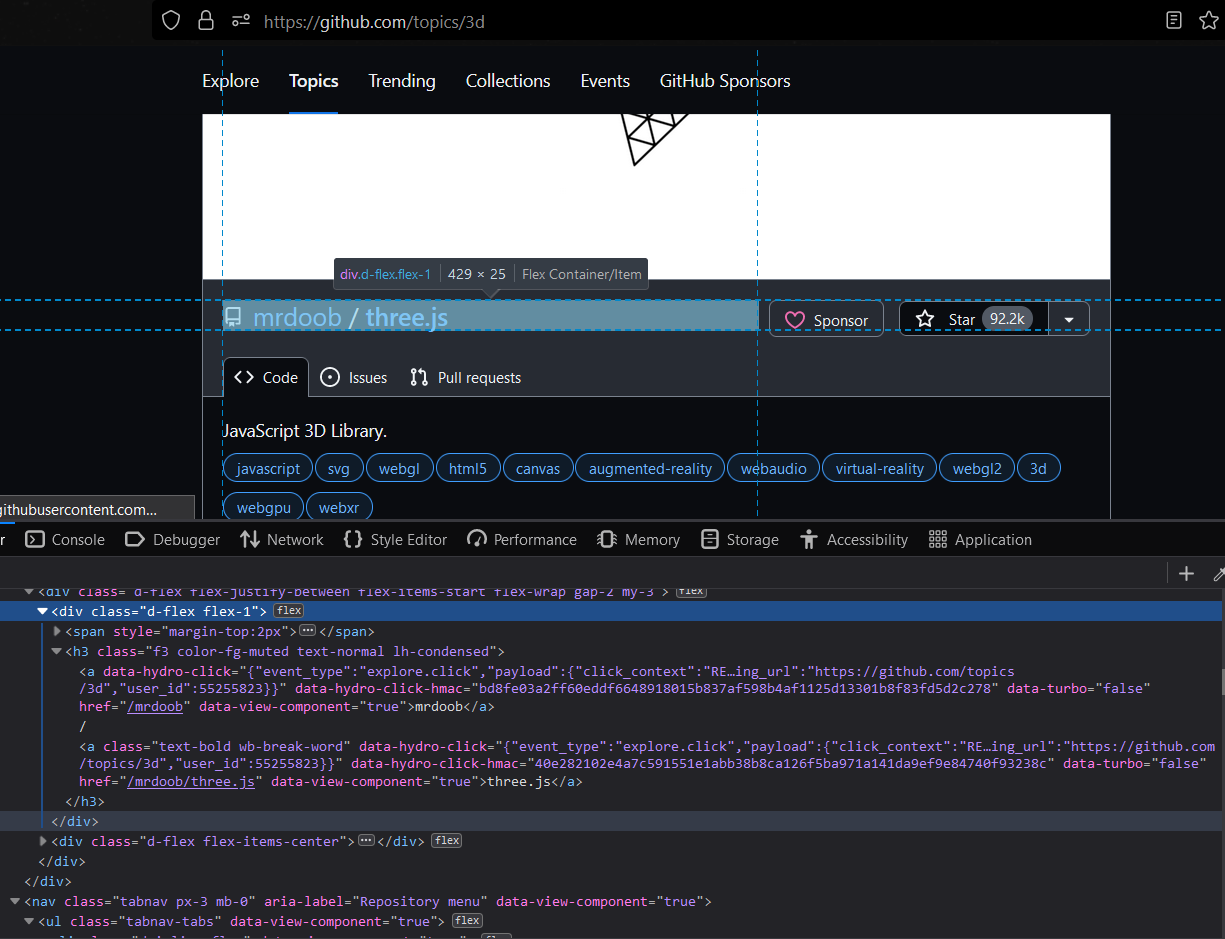

In [40]:
repo_tags = topic_doc.find_all('h3', {'class':'f3 color-fg-muted text-normal lh-condensed'})

In [41]:
len(repo_tags)

20

In [42]:
# Getting the first element of the variable
repo_tags[0]

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d89752156923904a4238816bc9b51ab7772f3e3644ce897d8dd4e5" data-turbo="false" data-view-component="true" href="/mrdoob/three.js

In [43]:
# Creating the a_tags variable to have html script with 'a'tags only from repo tags variable 
a_tags = repo_tags[0].find_all('a')

In [44]:
'''Converting first element of the a_tags variable into text along with strip function to remove unnecessary spaces 
to get username who uploaded that repository'''
a_tags[0].text.strip()

'mrdoob'

In [45]:
'''Converting Second element of the a_tags variable into text along with strip function to remove unnecessary spaces 
to get repository name who uploaded that repository'''
a_tags[1].text.strip()

'three.js'

In [46]:
# For finding the URL of the repository
# Extracting second element of a_tags variable with Attribute 'href' and adding it with base_url = 'https://github.com/'
repo_url = base_url + a_tags[1]['href']

In [47]:
repo_url

'https://github.com/mrdoob/three.js'

### For finding the total number of stars 3D repository get. We are converting with html script with 'span' tag and class = 'Counter js-social-count' to text with strip function
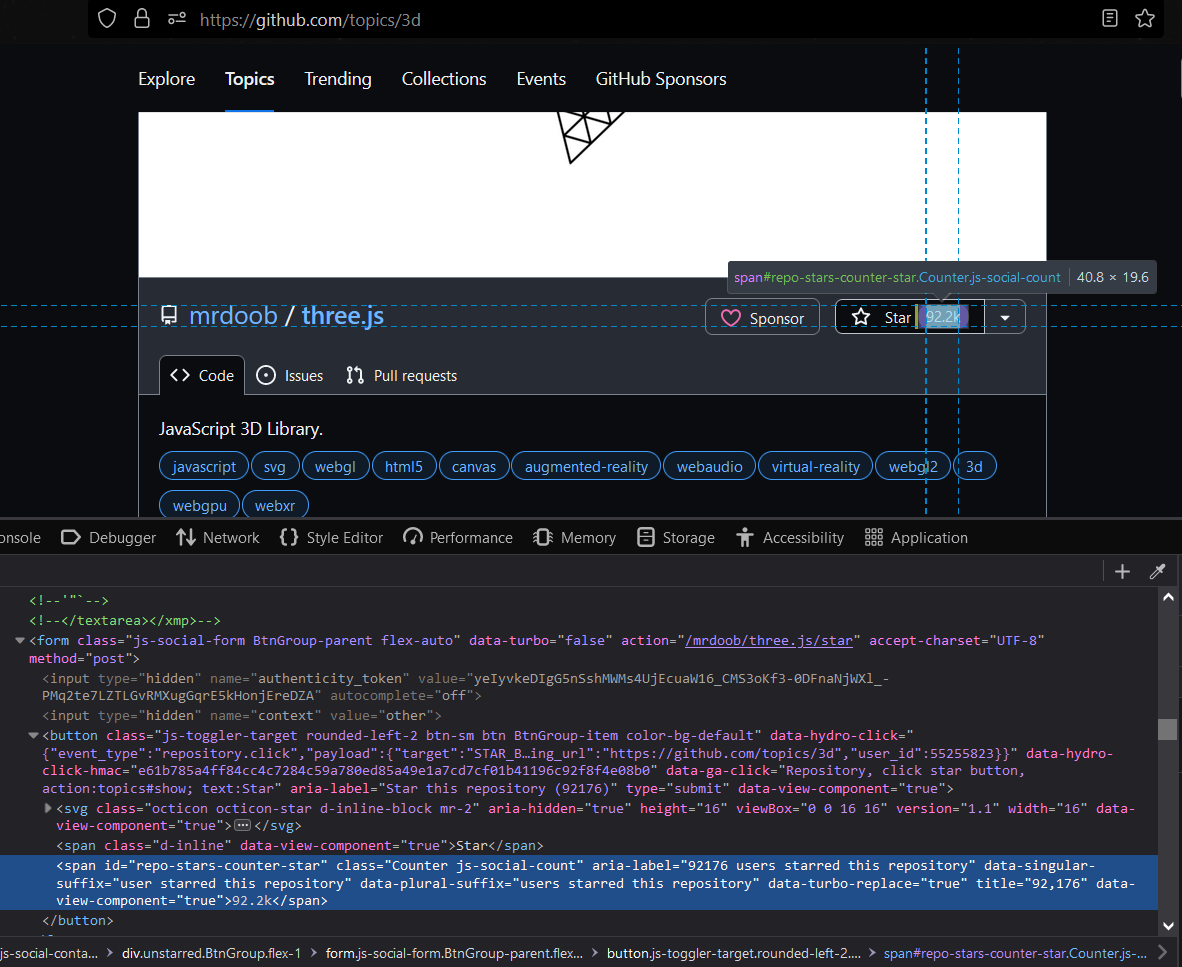


In [48]:
star_tags = topic_doc.find_all('span', {'class':'Counter js-social-count'})

In [49]:
star_tags[0]

<span aria-label="92190 users starred this repository" class="Counter js-social-count" data-plural-suffix="users starred this repository" data-singular-suffix="user starred this repository" data-turbo-replace="true" data-view-component="true" id="repo-stars-counter-star" title="92,190">92.2k</span>

In [50]:
star_tags[0].text.strip()

'92.2k'

In [51]:
# Writing function for removing the 'k' from repo_star_count and converting data type from string to Interger
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1]=='k':
        return int(float(stars_str[:-1]) * 1000)
    return stars_str    

In [52]:
# Using parse_star_count function
parse_star_count(star_tags[0].text.strip())

92200

In [53]:
'''Creating function which will take h1_tag and star_tag variable as input and return username, repository name, 
repository URL and number of stars a repository get'''

def get_repo_info(h1_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h1_tag.find_all('a')
    
    username = a_tags[0].text.strip()
    
    repo_name = a_tags[1].text.strip()
    
    repo_url =  base_url + a_tags[1]['href']
    
    # Using parse_star_count function
    stars = parse_star_count(star_tag.text.strip())
    
    return username, repo_name, stars, repo_url

In [54]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 92200, 'https://github.com/mrdoob/three.js')

### then, With the help of for loop and other appropriate methods we will scrape data for all 20 repository of '3D' Topic.

In [55]:
# Creating topic_repos_dict dictionary with key as username, repo_name, stars, repo_url and value as empty list
topic_repos_dict = {
    'username': [],
    'repo_name': [],
    'stars': [],
    'repo_url': []
}

# With the help of for loop, we are getting username, repo_name, repo_url and stars of all repository present in the topic
for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    # we appending the value we get from function get_repo_info function into topic_repos_dict dictionary 
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['repo_url'].append(repo_info[3])
    topic_repos_dict['stars'].append(repo_info[2])

In [56]:
# Converting list present in the dictionaries into pandas dataframe
topic_repos_df = pd.DataFrame(topic_repos_dict , index=None)

In [57]:
topic_repos_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,92200,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,22700,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,21500,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,20700,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,17000,https://github.com/ssloy/tinyrenderer
5,lettier,3d-game-shaders-for-beginners,15400,https://github.com/lettier/3d-game-shaders-for...
6,aframevr,aframe,15400,https://github.com/aframevr/aframe
7,FreeCAD,FreeCAD,14100,https://github.com/FreeCAD/FreeCAD
8,CesiumGS,cesium,10500,https://github.com/CesiumGS/cesium
9,metafizzy,zdog,9700,https://github.com/metafizzy/zdog


## Putting all in one, by creating functions which will ease our work to findout and scrap data of top featured topics on Github

#### This function will scrape username, repository name, repository URL and Stars that repository get for Each `Topic`

In [58]:
# This will username, repository name, repository URL and Stars that repository get of Each `Topic`
def get_topic_page(topic_url):
    topic_page_url = topic_url
    ## With the help of requests.get, we are downloading the html script of https://github.com/topics/3d
    response = requests.get(topic_page_url)
    
    # Checking the status code
    response.status_code
    
    # parsing with BeautifulSoup Library
    topic_doc = BeautifulSoup(response.text,'html.parser')
    
    # Finding the html text with 'h' tag and class = 'f3 color-fg-muted text-normal lh-condensed' to extract username, repository name and url of the repository.
    repo_tags = topic_doc.find_all('h3', {'class':'f3 color-fg-muted text-normal lh-condensed'})
    
    # Creating the a_tags variable to have html script with 'a'tags only
    a_tags = repo_tags[0].find_all('a')
    
    # Converting first element of the a_tags variable into text along with strip function to remove unnecessary spaces 
    a_tags[0].text.strip()
    
    # Converting Second element of the a_tags variable into text along with strip function to remove unnecessary spaces 
    a_tags[1].text.strip()

    # For finding the URL of the repository
    repo_url = base_url + a_tags[1]['href']

    # For finding the total number of stars repository get
    star_tags = topic_doc.find_all('span', {'class':'Counter js-social-count'})

    # Writing function for removing the 'k' from repo_star_count
    def parse_star_count(stars_str):
        stars_str = stars_str.strip()
        if stars_str[-1]=='k':
            return int(float(stars_str[:-1]) * 1000)
        return stars_str
    parse_star_count(star_tags[0].text.strip())

    def get_repo_info(h1_tag, star_tag):
        # returns all the required info about a repository
        a_tags = h1_tag.find_all('a')
        username = a_tags[0].text.strip()
        repo_name = a_tags[1].text.strip()
        repo_url =  base_url + a_tags[1]['href']
        stars = parse_star_count(star_tag.text.strip())
        return username, repo_name, stars, repo_url

    topic_repos_dict = {
        'username': [],
        'repo_name': [],
        'stars': [],
        'repo_url': []
    }


    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['repo_url'].append(repo_info[3])
        topic_repos_dict['stars'].append(repo_info[2])


    topic_repos_df = pd.DataFrame(topic_repos_dict , index=None)
    return topic_repos_df



#### We are creating another function which will take topic_url and topic_name as input which will create dataframe for username, repository name, repository URL and Stars that repository get as column then save as CSV file with File name as topic_name + '.csv' .
- It will first check file name 'topic_name.csv' exist or not. If 'topic_name.csv' already exist then it will skip the function and print 'The file {} already exists. Skipping...'
- If 'topic_name.csv' doesn't exist then, it will create dataframe for that topic_url which will contain username, repository name, repository URL and Stars that repository get as column then save as CSV file with File name as topic_name + '.csv'.

In [59]:
import os
def scrape_topic(topic_url, topic_name):
    if os.path.exists(topic_name+'.csv'):
        print("The file {} already exists. Skipping...".format(topic_name))
        return
    topic_df = get_topic_page(topic_url)
    topic_df.to_csv(topic_name + '.csv', index = None)
    

### After that, We will scrape data for all topic with the help of for loop and iterrrow function. We have created Function to scrape username, repository name, repository URL and Stars that repository get  for all the topic by passing Topic_url and Topic Title Tags with the help of for loop and iterrows.

In [60]:
def scrape_topic_repos():
    topics_df = scrape_topics()
    print('**Scraping list of topics**')
    for index, row in topic_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['Topic Title Tags']))
        print('With file name as',row['Topic Title Tags'],'.csv', 'and URL of the topic is', row['Topic Url'])
        scrape_topic(row['Topic Url'], row['Topic Title Tags'])
    

In [61]:
''' by running this cell, you can extract username, repository name, repository URL and Stars that repository get for 
all the topic'''
scrape_topic_repos()

**Scraping list of topics**
Scraping top repositories for "3D"
With file name as 3D .csv and URL of the topic is https://github.com/topics/3d
Scraping top repositories for "Ajax"
With file name as Ajax .csv and URL of the topic is https://github.com/topics/ajax
Scraping top repositories for "Algorithm"
With file name as Algorithm .csv and URL of the topic is https://github.com/topics/algorithm
Scraping top repositories for "Amp"
With file name as Amp .csv and URL of the topic is https://github.com/topics/amphp
Scraping top repositories for "Android"
With file name as Android .csv and URL of the topic is https://github.com/topics/android
Scraping top repositories for "Angular"
With file name as Angular .csv and URL of the topic is https://github.com/topics/angular
Scraping top repositories for "Ansible"
With file name as Ansible .csv and URL of the topic is https://github.com/topics/ansible
Scraping top repositories for "API"
With file name as API .csv and URL of the topic is https://gi